## Homework 04

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
sales = pd.read_csv("HeavenlyChocolates.csv")
sales.head()

,Customer,Day,Browser,Time,Pages_Viewed,Amount_Spent
0,1,Mon,Chrome,12.0,4,54.52
1,2,Wed,Other,19.5,6,94.90
2,3,Mon,Chrome,8.5,4,26.68
3,4,Tue,Firefox,11.4,2,44.73
4,5,Wed,Chrome,11.3,4,66.27


In [18]:
# Question 1
# Create a dataframe that shows the number of visits to Heavenly Chocoloate’s website using different browsers

unique_Browser = sales.Browser.unique()

count = []
for i in list(unique_Browser):
    count.append(sales[sales.Browser == i].count()[0])


data = pd.DataFrame({
    "Browser": unique_Browser,
    "Count": count
})

data

,Browser,Count
0,Chrome,27
1,Other,7
2,Firefox,16


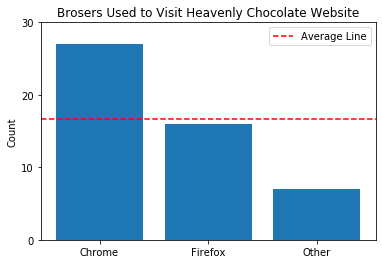

In [71]:
# Question 2
# Create s graph to show which browser is used more by the Heavenly Chocolate website visitors

plt.figure()

plt.bar(data.Browser, data.Count)

plt.axhline(y = data.Count.mean(), color = "red", linestyle = '--',
           label = 'Average Line')
plt.title('Brosers Used to Visit Heavenly Chocolate Website', fontsize = 12)
plt.ylabel('Count')
plt.yticks(range(0,31,10))

plt.legend() 
plt.show()

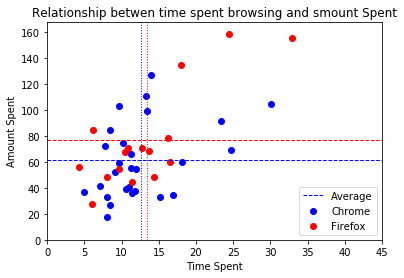

In [96]:
# Question 3
# Create a scatterplot that shows the relationship between the time spent browsing, and the amount spent buying using either Firefox or Chrome browswers. 

Chrome = sales[sales.Browser == 'Chrome']
Firefox = sales[sales.Browser == 'Firefox']

plt.figure()

plt.scatter(Chrome['Time'], Chrome['Amount_Spent'], 
            label = 'Chrome',
            color = 'blue')
plt.scatter(Firefox['Time'],Firefox['Amount_Spent'], 
            label = 'Firefox',
            color = 'red')

plt.axhline(y = Firefox.Amount_Spent.mean(), color = "red", linestyle = '--',
            linewidth = 1)
plt.axhline(y = Chrome.Amount_Spent.mean(), color = "blue", linestyle = '--',
            linewidth = 1,
            label = 'Average')
plt.axvline(x = Firefox.Time.mean(), color = "red", linestyle = ':',
            linewidth = 1)
plt.axvline(x = Chrome.Time.mean(), color = "blue", linestyle = ':',
            linewidth = 1)

plt.title('Relationship betwen time spent browsing and smount Spent', fontsize = 12)
plt.xlabel('Time Spent')
plt.ylabel('Amount Spent')
plt.xticks(range(0,46,5))
plt.yticks(range(0,171,20))

plt.legend(loc=4) 
plt.show()

In [35]:
# Question 4
# Create a chart which shows the number of website visitors per day for people using Chrome or Firefox

Chrome = sales[sales.Browser == 'Chrome']
Firefox = sales[sales.Browser == 'Firefox']

Day = pd.Series(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

count_Chrome_Day = []
for i in list(Day):
    count_Chrome_Day.append(Chrome[Chrome.Day == i].count()[0])


count_Firefox_Day =[]
for j in list(Day):
    count_Firefox_Day.append(Firefox[Firefox.Day == j].count()[0])
    
df_visitors = pd.DataFrame({
    "Day": Day,
    "Chrome_Day": count_Chrome_Day,
     "Firefox_Day": count_Firefox_Day
})

df_visitors

,Day,Chrome_Day,Firefox_Day
0,Mon,5,2
1,Tue,4,2
2,Wed,4,1
3,Thu,4,1
4,Fri,4,6
5,Sat,3,3
6,Sun,3,1


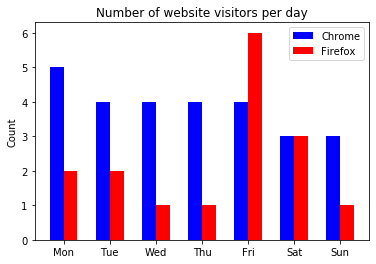

In [38]:
plt.figure()

pos = np.arange(len(Day))
barwidth = 0.3

plt.bar(pos - barwidth/2 , df_visitors["Chrome_Day"], 
        label = 'Chrome',
        width = barwidth,
        color = 'blue')

plt.bar(pos + barwidth/2, df_visitors['Firefox_Day'],
        label = 'Firefox',
        width = barwidth,
        color = 'red')

plt.xticks(pos)
ax = plt.gca()

ax.set_xticklabels(df_visitors["Day"])

plt.title('Number of website visitors per day')
plt.ylabel('Count')

plt.legend()
plt.show()